In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data preparded in EDA workbook

In [2]:
df = pd.read_csv('./input_file.csv')

Counting the no of changes due to one or many of the 23 diabetes drugs given to the patient by change type -- 'Down', 'Steady' and 'Up'

In [3]:
df = df.drop(columns = ['patient_nbr'])

In [4]:
df.shape

(97108, 80)

In [6]:
df.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'metformin', 'repaglinide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'readmitted', 'Up', 'Steady', 'Down',
       'diagnosis_count', 'diabetes_med_others', 'race_Asian',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'gender_Male',
       'age_[10-20)', 'age_[20-30)', 'age_[30-40)', 'age_[40-50)',
       'age_[50-60)', 'age_[60-70)', 'age_[70-80)', 'age_[80-90)',
       'age_[90-100)', 'admission_type_id_1', 'admission_type_id_2',
       'admission_type_id_3', 'discharge_disposition_id_2',
       'discharge_disposition_id_3', 'discharge_disposition_id_6',
       'discharge_disposition_id_18', 'discharge_disposition_id_0',
       'admission_source_id_1', 'admission_source_id_2',
       'admission_source_id_30', 'admission_source_id_40', 'chang

### Collapsing <30 days and >30 days readmits to one readmits and turning the problem to binary classification.  

In [7]:
### creating a map dictonary ###

readmit_map = {'<30':1, '>30':1, 'NO':0}


df['readmitted'] = df['readmitted'].map(readmit_map)

In [8]:
df.shape

(97108, 80)

In [9]:
# Import libraries needed for models
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [10]:
X = df.drop(columns=['readmitted'])
y = df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.25,
    random_state = 42
)
Z_train = X_train
Z_test = X_test
# sc = StandardScaler()
# Z_train = sc.fit_transform(X_train)
# Z_test = sc.transform(X_test)

#### Logistic Regression

In [11]:
### Instantiate & Fit Multinomial Logistic Regression ###

lr = LogisticRegression( max_iter=10000, penalty = 'elasticnet', l1_ratio = 0.25, solver='saga').fit(Z_train, y_train)

In [12]:
#Output predictions to output df
output = pd.DataFrame(y_test)

output['lr_predicts' ] = lr.predict(Z_test)


In [13]:
pd.crosstab(output['readmitted'], output['lr_predicts'])

lr_predicts,0,1
readmitted,,
0,9620,3093
1,6180,5384


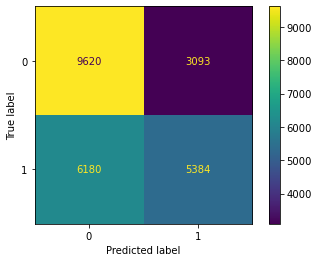

In [14]:
plot_confusion_matrix(lr,Z_test, y_test, values_format='d');

#### Decision Tree

In [15]:
### Decision Tree Classifier ###

## Import
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [16]:
### Instantiate and Fit
random =30
dt = DecisionTreeClassifier(random_state = random, max_depth = 5).fit(Z_train, y_train)

In [17]:
### Output predictions to output df
output['dt_predicts' ] = dt.predict(Z_test)

In [18]:
### Cross-tab Confusion Matrix
pd.crosstab(output['readmitted'], output['dt_predicts'])

dt_predicts,0,1
readmitted,,
0,9477,3236
1,6026,5538


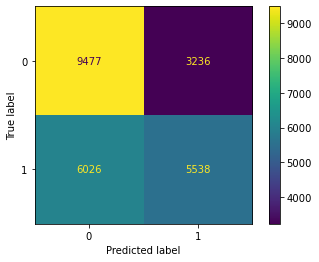

In [19]:
### Plot Confusion Matrix
plot_confusion_matrix(dt,Z_test, y_test, values_format='d');

#### KNN Classifier

In [20]:
### KNN Classifier ###

## Import ##
from sklearn.neighbors import KNeighborsClassifier

In [21]:
#KNN Classifier

## Instantiate & Fit KNN Classifier 
knn = KNeighborsClassifier().fit(Z_train, y_train)


In [22]:
### Output predictions to output df
output['knn_predicts' ] = knn.predict(Z_test)

In [23]:
pd.crosstab(output['readmitted'], output['knn_predicts'])

knn_predicts,0,1
readmitted,,
0,8055,4658
1,6095,5469


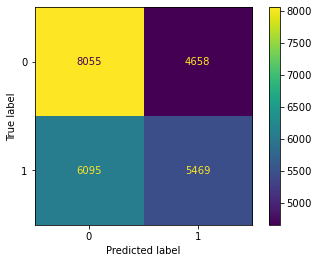

In [24]:
plot_confusion_matrix(knn,Z_test, y_test, values_format='d');

#### Bagging

In [25]:
### Bagging and Random Forests ##

## Import ##
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier


In [26]:
### Instantiate and Fit Bagging Classifier ###
bag = BaggingClassifier(random_state = random).fit(Z_train, y_train)

In [27]:
### Output predictions to output df
output['bag_predicts' ] = bag.predict(Z_test)

In [28]:
### Cross-tab Confusion Matrix
pd.crosstab(output['readmitted'], output['bag_predicts'])

bag_predicts,0,1
readmitted,,
0,8941,3772
1,6244,5320


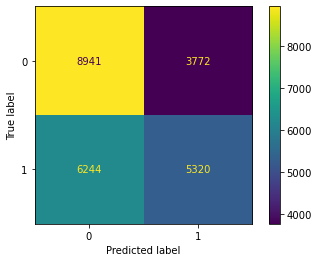

In [29]:
### Plot Confusion Matrix
plot_confusion_matrix(bag,Z_test, y_test, values_format='d');

#### Random Forest

In [30]:
### Random Forest ###

### Instantiate and Fit Random Forest Classifier ###
rf = RandomForestClassifier(n_estimators=1000).fit(Z_train, y_train)

In [31]:
### Output predictions to output df
output['rf_predicts' ] = rf.predict(Z_test)

In [32]:
### Cross-tab Confusion Matrix
pd.crosstab(output['readmitted'], output['rf_predicts'])

rf_predicts,0,1
readmitted,,
0,8865,3848
1,5271,6293


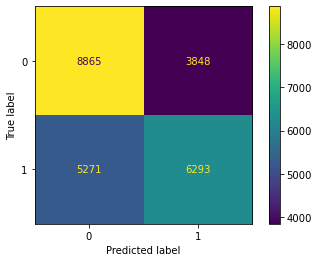

In [33]:
### Plot Confusion Matrix
plot_confusion_matrix(rf,Z_test, y_test, values_format='d');

#### Linear SVM Classifier

In [34]:
### SVM Linear ###

## Import ##
from sklearn.svm import LinearSVC

In [35]:
### Instantiate and Fit SVM Linear Classifier ###
svc = LinearSVC(max_iter=20000).fit(Z_train, y_train)

C:\Users\Rhino\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [36]:
### Output predictions to output df
output['svc_predicts' ] = svc.predict(Z_test)


In [37]:
### Cross-tab Confusion Matrix
pd.crosstab(output['readmitted'], output['svc_predicts'])

svc_predicts,0,1
readmitted,,
0,9151,3562
1,5720,5844


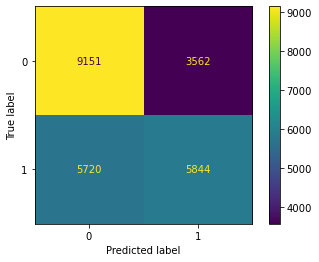

In [38]:
### Plot Confusion Matrix
plot_confusion_matrix(svc,Z_test, y_test);

#### Stochastic Gradient Descent (SGD)

In [39]:
from sklearn.linear_model import SGDClassifier

In [40]:
### Instantiate and Fit SVM Linear Classifier ###
sgdc = SGDClassifier(max_iter=1000, tol=0.001).fit(Z_train, y_train)

In [41]:
### Output predictions to output df
output['sgdc_predicts' ] = sgdc.predict(Z_test)
### Cross-tab Confusion Matrix
pd.crosstab(output['readmitted'], output['sgdc_predicts'])

sgdc_predicts,0,1
readmitted,,
0,9395,3318
1,6041,5523


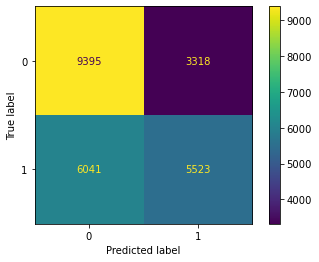

In [42]:
### Plot Confusion Matrix
plot_confusion_matrix(sgdc,Z_test, y_test);

In [43]:
print(f"Logisitic Regression: {lr.score(Z_test, y_test)}")
print(f"Decision Tree: {dt.score(Z_test, y_test)}")
print(f"KNN Classifier: {knn.score(Z_test, y_test)}")
print(f"Random Forest: {rf.score(Z_test, y_test)}")
print(f"Bagging: {bag.score(Z_test, y_test)}")
print(f"Support Vector Classifier: {svc.score(Z_test, y_test)}")
print(f"Stochastic Gradient Descent : {sgdc.score(Z_test, y_test)}")   

Logisitic Regression: 0.6180335296782963
Decision Tree: 0.6184866334390575
KNN Classifier: 0.5570704782304239
Random Forest: 0.6243769823289533
Bagging: 0.5874284302014252
Support Vector Classifier: 0.6176628084194917
Stochastic Gradient Descent : 0.6144910820941633


#### Exploring Pipelines & PCA
Checking if a reduced data set is effective for Logistic Regression

In [44]:
### Source: https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64, 74],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(Z_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.622):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 74}


#### Exporting Probability of Admits for each of the Classifiers & creating deciles based on the probabilities

_Excludes Linear SVM_

In [45]:
### Pushing Logisitic Regression probabilities to output df

output['lr_prob_0'] = lr.predict_proba(Z_test)[:,0]
output['lr_prob_1'] = lr.predict_proba(Z_test)[:,1]

## Sorting by prob_1

output.sort_values(by = 'lr_prob_1', ascending = False, inplace=True)

# adding Decile_rank column to the DataFrame 

output['lr_decile_rank'] = pd.qcut(output['lr_prob_1'], 10, labels = False)

In [46]:
###Exporting Logisitic Regression probabilities Only
output.to_csv('./output_lr.csv', index=False)

In [47]:
### Pushing Randon Forest probabilities to output df

output['rf_prob_0'] = rf.predict_proba(Z_test)[:,0]
output['rf_prob_1'] = rf.predict_proba(Z_test)[:,1]

## Sorting by prob_1

output.sort_values(by = 'rf_prob_1', ascending = False, inplace=True)

# adding Decile_rank column to the DataFrame 

output['rf_decile_rank'] = pd.qcut(output['rf_prob_1'], 10, duplicates ='raise',labels = False)

In [48]:
### Pushing Bagging probabilities to output df

output['bag_prob_0'] = bag.predict_proba(Z_test)[:,0]
output['bag_prob_1'] = bag.predict_proba(Z_test)[:,1]

## Sorting by prob_1

# output.sort_values(by = 'bag_prob_1', ascending = False, inplace=True)

# adding Decile_rank column to the DataFrame 

output['bag_decile_rank'] = pd.qcut(output['bag_prob_1'].rank(method='first'), 10, labels = False)


In [49]:
### Pushing Decision Tree probabilities to output df

output['dt_prob_0'] = dt.predict_proba(Z_test)[:,0]
output['dt_prob_1'] = dt.predict_proba(Z_test)[:,1]


# adding Decile_rank column to the DataFrame 

output['dt_decile_rank'] = pd.qcut(output['dt_prob_1'].rank(method='first'), 10, labels = False)

In [50]:
### Pushing Decision Tree probabilities to output df

output['knn_prob_0'] = knn.predict_proba(Z_test)[:,0]
output['knn_prob_1'] = knn.predict_proba(Z_test)[:,1]


# adding Decile_rank column to the DataFrame 

output['knn_decile_rank'] = pd.qcut(output['knn_prob_1'].rank(method='first'), 10, labels = False)

In [51]:
###Exporting all ranks and probabilities)
output.to_csv('./model_output.csv', index=False)

In [52]:
Z_train.shape, y_train.shape, Z_test.shape, y_test.shape

((72831, 79), (72831,), (24277, 79), (24277,))

### Using Neural Network

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [54]:
# from sklearn.preprocessing import LabelEncoder
# from keras.utils import np_utils

# # first we have to encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(y_train)
# y_train_encoded = encoder.transform(y_train)
# Y_train = np_utils.to_categorical(y_train_encoded)
# y_test_encoded = encoder.transform(y_test)
# Y_test = np_utils.to_categorical(y_test_encoded)

In [55]:
model =Sequential()
model.add(Dense(160,  ## No of neurons in the first layer Rule of thumbs base 2 # > no of features
          input_shape = (79, ), ##shape of one sample of the training data
          activation= 'relu')) ##rectified linear unit -- very popular & common

model.add(Dense(80, activation = 'relu'))

model.add(Dense(16, activation = 'relu'))



model.add(Dense(1, activation = 'sigmoid'))
          
# Compile it

# What are the two primary components of compiling the NN? 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [56]:
model_dropout =Sequential()
model_dropout.add(Dense(160,  ## No of neurons in the first layer Rule of thumbs base 2 # > no of features
          input_shape = (79, ), ##shape of one sample of the training data
          activation= 'relu')) ##rectified linear unit -- very popular & common
model_dropout.add(Dropout(0.2))  ##Add here

model_dropout.add(Dense(80, activation = 'relu'))
model_dropout.add(Dropout(0.2))  ##Add droupout

model_dropout.add(Dense(16, activation = 'relu'))
model_dropout.add(Dropout(0.2))  ##Add droupout


model_dropout.add(Dense(1, activation = 'sigmoid'))
          
# Compile it

# What are the two primary components of compiling the NN? 
model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])




In [57]:
# Fit the model
# What are all the possible components here? What are the areas we explored on Thursday?

history= model.fit(Z_train, y_train, validation_data=(Z_test, y_test), epochs=100, batch_size=512, verbose=1)


Epoch 1/100
143/143 [==============================] - 1s 8ms/step - loss: 0.6788 - accuracy: 0.5886 - val_loss: 0.6535 - val_accuracy: 0.6123
Epoch 2/100
143/143 [==============================] - 0s 3ms/step - loss: 0.6509 - accuracy: 0.6181 - val_loss: 0.6492 - val_accuracy: 0.6186
Epoch 3/100
143/143 [==============================] - 0s 3ms/step - loss: 0.6466 - accuracy: 0.6226 - val_loss: 0.6446 - val_accuracy: 0.6249
Epoch 4/100
143/143 [==============================] - 0s 3ms/step - loss: 0.6441 - accuracy: 0.6267 - val_loss: 0.6462 - val_accuracy: 0.6226
Epoch 5/100
143/143 [==============================] - 0s 3ms/step - loss: 0.6431 - accuracy: 0.6269 - val_loss: 0.6432 - val_accuracy: 0.6267
Epoch 6/100
143/143 [==============================] - 0s 3ms/step - loss: 0.6416 - accuracy: 0.6295 - val_loss: 0.6468 - val_accuracy: 0.6224
Epoch 7/100
143/143 [==============================] - 0s 3ms/step - loss: 0.6404 - accuracy: 0.6284 - val_loss: 0.6475 - val_accuracy: 0.6220

In [58]:
# Fit the model
# What are all the possible components here? What are the areas we explored on Thursday?

history_dropout= model_dropout.fit(Z_train, y_train, validation_data=(Z_test, y_test), epochs=100, batch_size=512, verbose=1)


Epoch 1/100
143/143 [==============================] - 1s 6ms/step - loss: 0.7428 - accuracy: 0.5198 - val_loss: 0.6927 - val_accuracy: 0.5237
Epoch 2/100
143/143 [==============================] - 1s 5ms/step - loss: 0.6931 - accuracy: 0.5259 - val_loss: 0.6922 - val_accuracy: 0.5237
Epoch 3/100
143/143 [==============================] - 1s 5ms/step - loss: 0.6913 - accuracy: 0.5261 - val_loss: 0.6908 - val_accuracy: 0.5237
Epoch 4/100
143/143 [==============================] - 1s 5ms/step - loss: 0.6892 - accuracy: 0.5264 - val_loss: 0.6844 - val_accuracy: 0.5256
Epoch 5/100
143/143 [==============================] - 1s 5ms/step - loss: 0.6802 - accuracy: 0.5487 - val_loss: 0.6728 - val_accuracy: 0.6011
Epoch 6/100
143/143 [==============================] - 1s 5ms/step - loss: 0.6662 - accuracy: 0.6013 - val_loss: 0.6502 - val_accuracy: 0.6162
Epoch 7/100
143/143 [==============================] - 1s 5ms/step - loss: 0.6575 - accuracy: 0.6113 - val_loss: 0.6482 - val_accuracy: 0.6227

Epoch 58/100
143/143 [==============================] - 1s 5ms/step - loss: 0.6162 - accuracy: 0.6544 - val_loss: 0.6515 - val_accuracy: 0.6261
Epoch 59/100
143/143 [==============================] - 1s 5ms/step - loss: 0.6153 - accuracy: 0.6560 - val_loss: 0.6492 - val_accuracy: 0.6266
Epoch 60/100
143/143 [==============================] - 1s 5ms/step - loss: 0.6142 - accuracy: 0.6571 - val_loss: 0.6520 - val_accuracy: 0.6277
Epoch 61/100
143/143 [==============================] - 1s 5ms/step - loss: 0.6125 - accuracy: 0.6571 - val_loss: 0.6532 - val_accuracy: 0.6248
Epoch 62/100
143/143 [==============================] - 1s 5ms/step - loss: 0.6131 - accuracy: 0.6548 - val_loss: 0.6522 - val_accuracy: 0.6244
Epoch 63/100
143/143 [==============================] - 1s 5ms/step - loss: 0.6111 - accuracy: 0.6591 - val_loss: 0.6560 - val_accuracy: 0.6246
Epoch 64/100
143/143 [==============================] - 1s 5ms/step - loss: 0.6117 - accuracy: 0.6590 - val_loss: 0.6541 - val_accuracy:

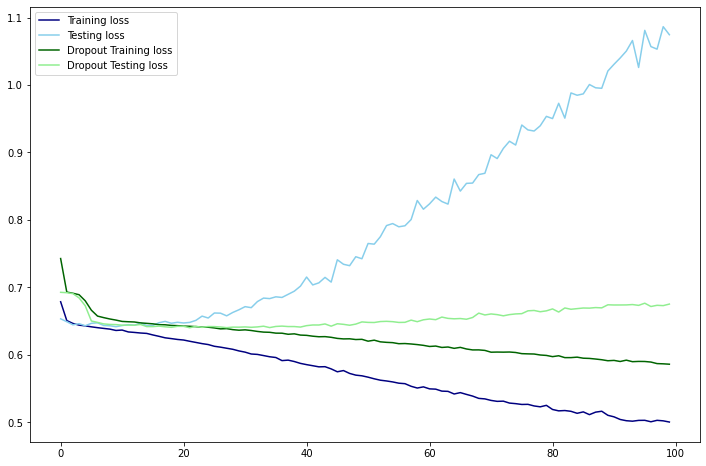

In [59]:
# Visualize loss
train_loss = history.history['loss']
test_loss = history.history['val_loss']


train_loss_dropout = history_dropout.history['loss']
test_loss_dropout = history_dropout.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.plot(train_loss_dropout, label='Dropout Training loss', color='darkgreen')
plt.plot(test_loss_dropout, label='Dropout Testing loss', color='lightgreen')
plt.legend();